In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(12345)  
from scipy import stats

In [56]:
def AppendixVI(n,factor=['A','n','A','A2','A3','c4','1/c4','B3','B4','B5','B6','d2','1/d2','d3','D1','D2','D3','D4'][-4]):
    #Note that appendix AppendixVI is based on 0.997 confidence level (i.e. z_zalpha_2`~2.97)'
    '''
    Just an alternative for looking up the table
    n: sample size
    factor: factor to be checked at n 
    '''
    AppendixVI=pd.read_csv('AppendixVI.csv',index_col='n')
    return AppendixVI[factor][n]

In [57]:
def closest_lower_index(lst, target):
    lower_values = [value for value in lst if value < target]
    if not lower_values:
        return None
    return lst.index(max(lower_values))

# Q1_A

In [58]:
n=150 #Here we are dealing with constant sample size #Given
P_bar=0.0185 #Average proportion of defective items #Given
alpha=0.002 #Given

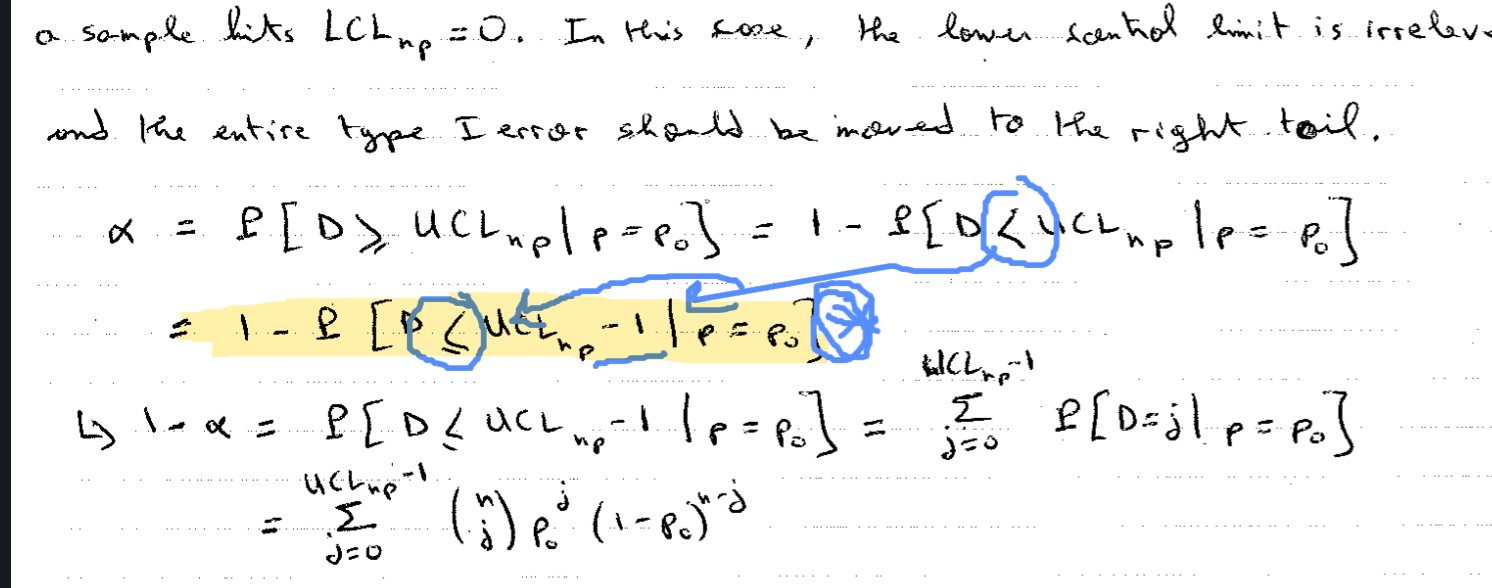

In [59]:

def LCL_np_chart(n,P_bar,alpha,printing=True):
    LCL=stats.binom.ppf(q=alpha/2,n=n,p=P_bar)
    if LCL==0:
        left_tail_type_1_error=stats.binom.cdf(k=LCL,n=n,p=P_bar)
        if printing: print(f'Having Zero Defectives is Likely For Your Case, Switch to "one-sided" Test')
        if printing:print(f'LCL is {LCL}')
        if printing: print(f"The right tail type 1 error is equal to {left_tail_type_1_error} which is irelevant !!!")
        return 0,'one-sided'
    elif LCL>0:
        left_tail_type_1_error=stats.binom.cdf(k=LCL,n=n,p=P_bar)
        if printing: print(f"The right tail type 1 error is equal to {left_tail_type_1_error}")
        #TODO: check with the instructor if the below is needed 
        if left_tail_type_1_error>alpha/2:
            LCL=max(0,LCL-1)
            left_tail_type_1_error=stats.binom.cdf(k=LCL,n=n,p=P_bar)
            if printing:print(f'LCL is {LCL}')
            if printing: print(f"The right tail type 1 error is equal to {left_tail_type_1_error} which is irelevant !!!")
            return LCL,'two-sided'


In [60]:
def UCL_np_chart(n,P_bar,alpha,mode='two-sided',printing=True,conservative=True):
    if mode not in ['two-sided','one-sided']:

        if printing: print('Mode should be either two-sided or one-sided')
        return None
    else:
        if printing: print(f'**************{mode} is Activated**************')    
        if mode=='two-sided':
            UCL=stats.binom.ppf(q=1-alpha/2,n=n,p=P_bar)
            right_tail_type_1_error=1-stats.binom.cdf(k=UCL-1,n=n,p=P_bar)
            if (right_tail_type_1_error>alpha/2):
                UCL+=1
                right_tail_type_1_error=1-stats.binom.cdf(k=UCL-1,n=n,p=P_bar)   
        elif mode=='one-sided':
            if printing: print(f'Having Zero Defectives is Likely For Your Case, Switch to "one-sided" Test')
            UCL=stats.binom.ppf(q=1-alpha,n=n,p=P_bar)
            right_tail_type_1_error=1-stats.binom.cdf(k=UCL-1,n=n,p=P_bar)
            if (right_tail_type_1_error>alpha):
                UCL+=1
                right_tail_type_1_error=1-stats.binom.cdf(k=UCL-1,n=n,p=P_bar)
        
        
        if printing: print(f"Your UCL is {UCL}, leading to left tail type 1 error is equal to {right_tail_type_1_error}")
        if printing: print(f"If you reduce UCL to {UCL-1},  left tail type 1 error will be equal to {1-stats.binom.cdf(k=UCL-2,n=n,p=P_bar)}")
        if conservative: #alpha conservative
            if printing: print(f'Returning Alpha Conservative UCL of {UCL}')
            return UCL
        else:
            if printing: print(f'Returning Alpha Non-Conservative UCL of {UCL-1}')
            return UCL-1
        
        

In [61]:
LCL,mode_recommended=LCL_np_chart(n=150,P_bar=0.0185,alpha=0.002)


Having Zero Defectives is Likely For Your Case, Switch to "one-sided" Test
LCL is 0.0
The right tail type 1 error is equal to 0.06074990322036292 which is irelevant !!!


In [62]:
UCL=UCL_np_chart(150,0.0185,0.002,mode=mode_recommended,printing=True,conservative=False)


**************one-sided is Activated**************
Having Zero Defectives is Likely For Your Case, Switch to "one-sided" Test
Your UCL is 10.0, leading to left tail type 1 error is equal to 0.0005248256512309091
If you reduce UCL to 9.0,  left tail type 1 error will be equal to 0.002037967655534434
Returning Alpha Non-Conservative UCL of 9.0


# Q1 B

In [63]:
p_1=0.04 #Given
if mode_recommended=='two-sided':
    beta=stats.binom.cdf(UCL-1,n=n,p=p_1)-stats.binom.cdf(LCL+1,n=n,p=p_1)
elif mode_recommended=='one-sided':
    beta=stats.binom.cdf(UCL-1,n=n,p=p_1)-stats.binom.cdf(0,n=n,p=p_1)
print(f'beta is {beta}')

beta is 0.849299305058348


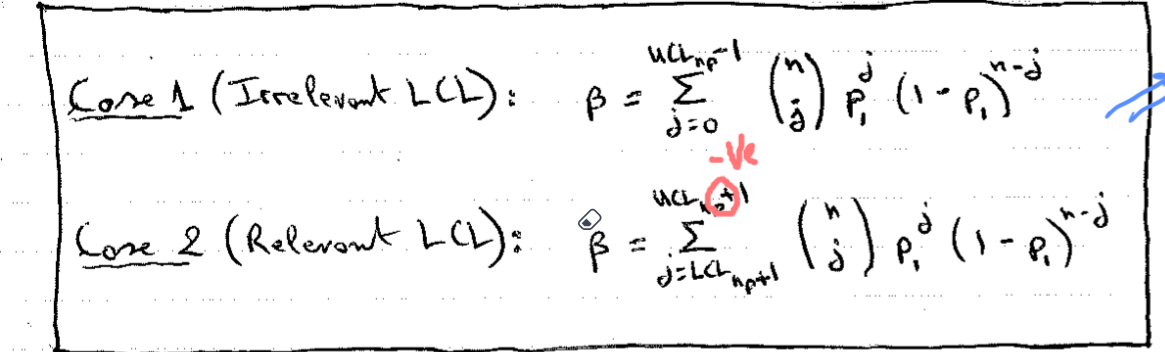

# Q1 C

Text(0.5, 1.0, 'beta vs n')

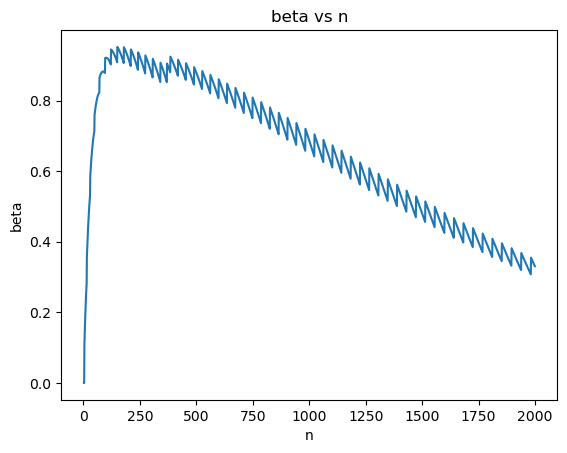

In [64]:
p_1=0.03 #Given
beta_list=[]
n_list=np.arange(2,2000,1)
for n_current in n_list:
    LCL,mode_recommended=LCL_np_chart(n=n_current,P_bar=0.0185,alpha=0.002,printing=False)
    UCL=UCL_np_chart(n=n_current,P_bar=0.0185,alpha=0.002,mode=mode_recommended,printing=False,conservative=False)
    if mode_recommended=='two-sided':
        beta=stats.binom.cdf(UCL-1,n=n_current,p=p_1)-stats.binom.cdf(LCL+1,n=n_current,p=p_1)
    elif mode_recommended=='one-sided':
        beta=stats.binom.cdf(UCL-1,n=n_current,p=p_1)-stats.binom.cdf(0,n=n_current,p=p_1)
    beta_list.append(beta)
plt.plot(n_list,beta_list) #The plot look weird, in the beginning, increasing n increase beta error ??
plt.xlabel('n')
plt.ylabel('beta')
plt.title('beta vs n')

In [65]:
target_beta=0.5
sol_index=closest_lower_index(beta_list, target_beta)
print(f'For beta of {target_beta}, n should be {n_list[sol_index]}, achieving beta of {beta_list[sol_index]}')

For beta of 0.5, n should be 1522, achieving beta of 0.49982559373763685


In [66]:
# For verfication with the solution, note that last two are different as the sol is using normal approximation. I guess.
for N in [150,500,1500,1300]:
    print(f'beta = {beta_list[list(n_list).index(N)]} at N={N}') 

beta = 0.9518208761674657 at N=150
beta = 0.8785874804081462 at N=500
beta = 0.4792677920016107 at N=1500
beta = 0.5424535532097786 at N=1300


# Winter 2021 Code

NameError: name 'P_hat' is not defined

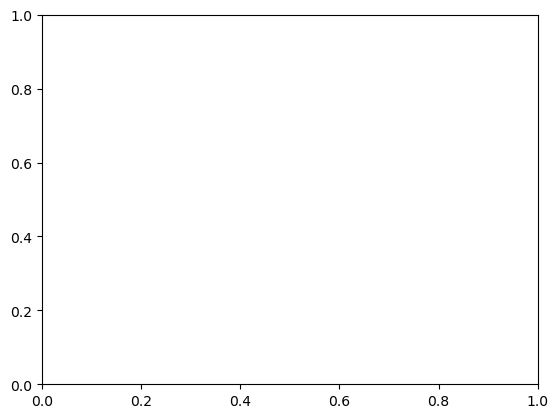

In [67]:


CL_P_bar=P_bar

P_Par_UCL=CL_P_bar+3*np.sqrt(CL_P_bar*(1-CL_P_bar)/n)
P_Par_LCL=CL_P_bar-3*np.sqrt(CL_P_bar*(1-CL_P_bar)/n)

if P_Par_LCL<0: #Note that we changed the LCL to zero since it was negative 
    P_Par_LCL=0

ax = plt.figure().gca()
ax.plot(P_hat,marker="o")
ax.axhline(y = CL_P_bar, color = 'r', linestyle = '-')
ax.axhline(y = P_Par_LCL, color = 'r', linestyle = '-')
ax.axhline(y = P_Par_UCL, color = 'r', linestyle = '-')

from matplotlib.ticker import MaxNLocator
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.grid(True)
plt.title('P chart')
plt.show()
print(f'The centeral limit for the P chart is {CL_P_bar}')
print(f'The upper limit for the P chart is {P_Par_UCL}')

print(f'The lowe limit for the P chart is {P_Par_LCL}')

In [ ]:
s=df.std(axis=1,ddof=1)
s_bar=s.mean()
n=df.shape[1]
B_4=AppendixVI(n,factor='B4')
B_3=AppendixVI(n,factor='B3')
print(B_4,B_3)
UCL_s=s_bar*B_4
LCL_s=s_bar*B_3
CL_s=s_bar
print(UCL_s,CL_s,LCL_s)


2.568 0.0
0.0012279435128768027 0.00047817114987414434 0.0


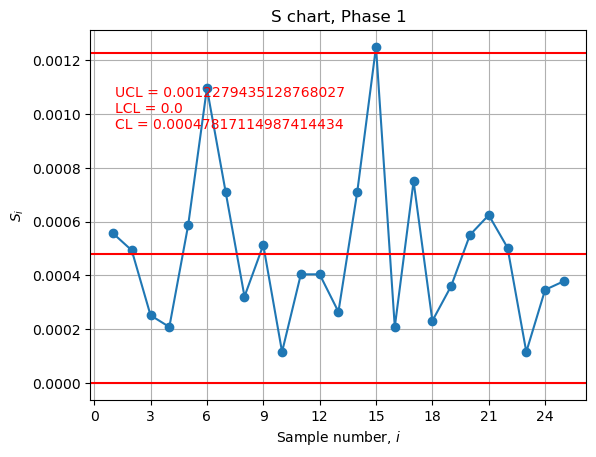

In [ ]:
ax = plt.figure().gca()
ax.plot(s.index,s,marker="o")
ax.axhline(y = UCL_s, color = 'r', linestyle = '-')
ax.axhline(y = LCL_s, color = 'r', linestyle = '-')
# add text showing the value of UCL and LCL
ax.text(0.05, 0.85, 'UCL = {}\nLCL = {}\nCL = {}'.format(UCL_s, LCL_s, CL_s),
         verticalalignment='top', horizontalalignment='left',
         transform=ax.transAxes, color='red', fontsize=10)

ax.axhline(y = CL_s, color = 'r', linestyle = '-')
from matplotlib.ticker import MaxNLocator
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.grid(True)
plt.title('S chart, Phase 1')
plt.xlabel('Sample number, $i$')
plt.ylabel('$S_i$')

plt.show()


In [ ]:
UCL_s

0.0012279435128768027

In [ ]:
s

1     0.000557
2     0.000493
3     0.000252
4     0.000208
5     0.000586
6     0.001097
7     0.000709
8     0.000321
9     0.000513
10    0.000115
11    0.000404
12    0.000404
13    0.000265
14    0.000709
15    0.001250
16    0.000208
17    0.000751
18    0.000231
19    0.000361
20    0.000551
21    0.000624
22    0.000503
23    0.000115
24    0.000346
25    0.000379
dtype: float64

In [ ]:
s.ge(UCL_s)

1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15     True
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
dtype: bool

In [ ]:
s.le(LCL_s)

1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
dtype: bool

s.le(LCL_s)

In [ ]:
Mask_to_remove_1=[s_i < LCL_s or s_i > UCL_s for s_i in list(s)]
Mask_to_remove_1
# #Equvilantely
# Mask_to_remove_1=(s.ge(UCL_s) | s.le(LCL_s))

[False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False]

In [ ]:
df=pd.read_csv("DataLab5_B_MIE304.csv",header=None)
df=df.iloc[1:,1:]
# use mask to keep only the rows that are within the control limits
df[Mask_to_remove_1]=np.nan
df

,1,2,3
1,0.0629,0.0636,0.0640
2,0.0630,0.0631,0.0622
3,0.0628,0.0631,0.0633
4,0.0634,0.0630,0.0631
5,0.0619,0.0628,0.0630
6,0.0613,0.0629,0.0634
7,0.0630,0.0639,0.0625
8,0.0628,0.0627,0.0622
9,0.0623,0.0626,0.0633
10,0.0631,0.0631,0.0633


In [ ]:
s=df.std(axis=1,ddof=1)
s_bar=s.mean()
n=df.shape[1]
B_4=AppendixVI(n,factor='B4')
B_3=AppendixVI(n,factor='B3')
print(B_4,B_3)
UCL_s=s_bar*B_4
LCL_s=s_bar*B_3
CL_s=s_bar
print(UCL_s,CL_s,LCL_s)


2.568 0.0
0.0011453221640009574 0.000445997727414703 0.0


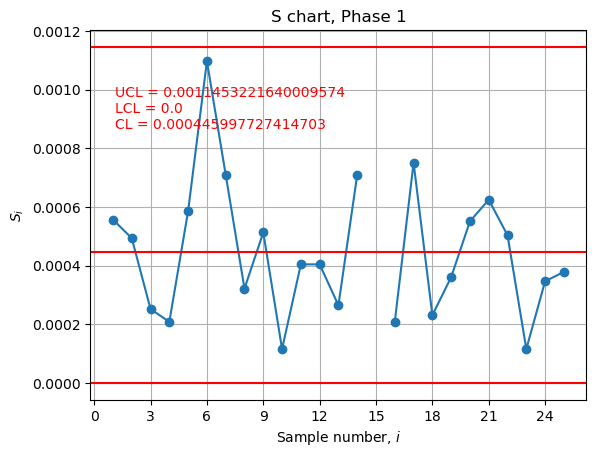

In [ ]:
ax = plt.figure().gca()
ax.plot(s.index,s,marker="o")
ax.axhline(y = UCL_s, color = 'r', linestyle = '-')
ax.axhline(y = LCL_s, color = 'r', linestyle = '-')
# add text showing the value of UCL and LCL
ax.text(0.05, 0.85, 'UCL = {}\nLCL = {}\nCL = {}'.format(UCL_s, LCL_s, CL_s),
         verticalalignment='top', horizontalalignment='left',
         transform=ax.transAxes, color='red', fontsize=10)

ax.axhline(y = CL_s, color = 'r', linestyle = '-')
from matplotlib.ticker import MaxNLocator
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.grid(True)
plt.title('S chart, Phase 1')
plt.xlabel('Sample number, $i$')
plt.ylabel('$S_i$')

plt.show()

# End of week 5. (o6 Feb 2023)
# Start of week 6

# Next Phase #1 for the X_bar

In [ ]:
df=pd.read_csv("DataLab5_B_MIE304.csv",header=None)
df=df.iloc[1:,1:]
# use mask to keep only the rows that are within the control limits
df[Mask_to_remove_1]=np.nan # Use only the samples that are within the control limits of S chart from phase 1
df

,1,2,3
1,0.0629,0.0636,0.0640
2,0.0630,0.0631,0.0622
3,0.0628,0.0631,0.0633
4,0.0634,0.0630,0.0631
5,0.0619,0.0628,0.0630
6,0.0613,0.0629,0.0634
7,0.0630,0.0639,0.0625
8,0.0628,0.0627,0.0622
9,0.0623,0.0626,0.0633
10,0.0631,0.0631,0.0633


0.06381453511492388 0.06294305555555556 0.06207157599618723


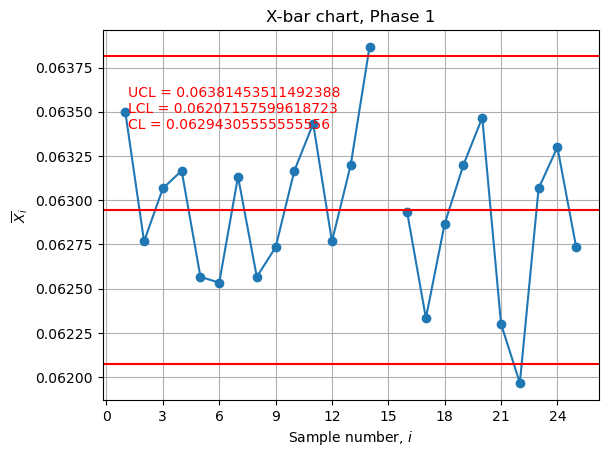

In [ ]:
xbar=df.mean(axis=1) #mean for each sample
x_bar_bar=xbar.mean() #mean of all sample means
A3=AppendixVI(n,factor='A3')
UCL_x_bar=x_bar_bar+A3*s_bar
LCL_x_bar=x_bar_bar-A3*s_bar
CL_x_bar=x_bar_bar
print(UCL_x_bar,CL_x_bar,LCL_x_bar)

ax = plt.figure().gca()
ax.plot(xbar.index,xbar,marker="o")
ax.axhline(y = UCL_x_bar, color = 'r', linestyle = '-')
ax.axhline(y = LCL_x_bar, color = 'r', linestyle = '-')
ax.axhline(y = CL_x_bar, color = 'r', linestyle = '-')
ax.text(0.05, 0.85, 'UCL = {}\nLCL = {}\nCL = {}'.format(UCL_x_bar, LCL_x_bar, CL_x_bar),
         verticalalignment='top', horizontalalignment='left',
         transform=ax.transAxes, color='red', fontsize=10)
from matplotlib.ticker import MaxNLocator
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.grid(True)
plt.title('X-bar chart, Phase 1')
plt.xlabel('Sample number, $i$')
plt.ylabel('$\overline{X}_i$')
plt.show()

In [ ]:
Mask_to_remove_2=[x_i < LCL_x_bar or x_i > UCL_x_bar for x_i in list(xbar)]


In [ ]:
Mask_to_remove_2

[False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False]

In [ ]:

Mask_to_remove_21=[Mask_to_remove_1[i] or Mask_to_remove_2[i] for i in range(len(Mask_to_remove_1))]

In [ ]:
Mask_to_remove_21

[False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False]

In [ ]:
df=pd.read_csv("DataLab5_B_MIE304.csv",header=None)
df=df.iloc[1:,1:]
# use mask to keep only the rows that are within the control limits
df[Mask_to_remove_21]=np.nan
df

,1,2,3
1,0.0629,0.0636,0.0640
2,0.0630,0.0631,0.0622
3,0.0628,0.0631,0.0633
4,0.0634,0.0630,0.0631
5,0.0619,0.0628,0.0630
6,0.0613,0.0629,0.0634
7,0.0630,0.0639,0.0625
8,0.0628,0.0627,0.0622
9,0.0623,0.0626,0.0633
10,0.0631,0.0631,0.0633


0.06381693410482286 0.06294545454545454 0.06207397498608621


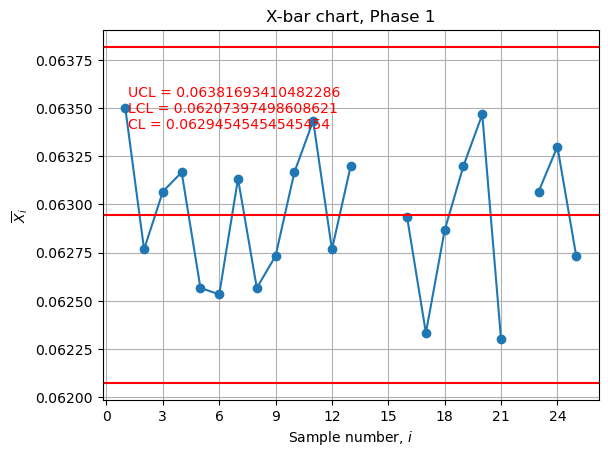

In [ ]:
xbar=df.mean(axis=1) #mean for each sample
x_bar_bar=xbar.mean() #mean of all sample means
A3=AppendixVI(n,factor='A3')
UCL_x_bar=x_bar_bar+A3*s_bar
LCL_x_bar=x_bar_bar-A3*s_bar
CL_x_bar=x_bar_bar
print(UCL_x_bar,CL_x_bar,LCL_x_bar)

ax = plt.figure().gca()
ax.plot(xbar.index,xbar,marker="o")
ax.axhline(y = UCL_x_bar, color = 'r', linestyle = '-')
ax.axhline(y = LCL_x_bar, color = 'r', linestyle = '-')
ax.axhline(y = CL_x_bar, color = 'r', linestyle = '-')
ax.text(0.05, 0.85, 'UCL = {}\nLCL = {}\nCL = {}'.format(UCL_x_bar, LCL_x_bar, CL_x_bar),
         verticalalignment='top', horizontalalignment='left',
         transform=ax.transAxes, color='red', fontsize=10)
from matplotlib.ticker import MaxNLocator
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.grid(True)
plt.title('X-bar chart, Phase 1')
plt.xlabel('Sample number, $i$')
plt.ylabel('$\overline{X}_i$')
plt.show()

# X bar chart phase 1 is done (for now)
## Next we make sure that we still have stable (aka everything in bound) in the s chart

In [ ]:
df=pd.read_csv("DataLab5_B_MIE304.csv",header=None)
df=df.iloc[1:,1:]
# use mask to keep only the rows that are within the control limits
df[Mask_to_remove_21]=np.nan #Note that we are using the same last mask, 
#because nothing was OUTSIDE the control limits of the X-bar chart after revising it.
df

,1,2,3
1,0.0629,0.0636,0.0640
2,0.0630,0.0631,0.0622
3,0.0628,0.0631,0.0633
4,0.0634,0.0630,0.0631
5,0.0619,0.0628,0.0630
6,0.0613,0.0629,0.0634
7,0.0630,0.0639,0.0625
8,0.0628,0.0627,0.0622
9,0.0623,0.0626,0.0633
10,0.0631,0.0631,0.0633


2.568 0.0
0.0011078776039609075 0.00043141651244583626 0.0


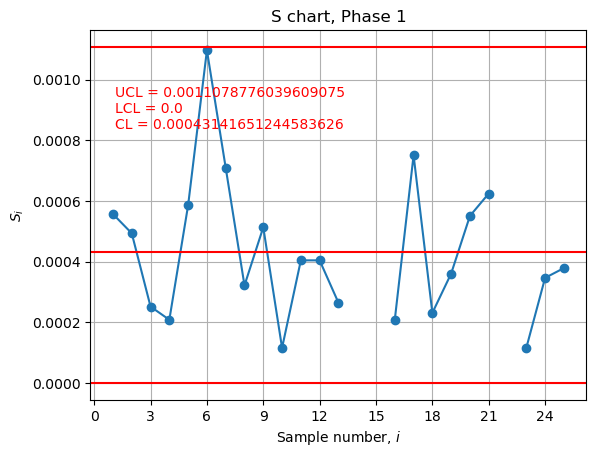

In [ ]:
s=df.std(axis=1,ddof=1)
s_bar=s.mean()
n=df.shape[1]
B_4=AppendixVI(n,factor='B4')
B_3=AppendixVI(n,factor='B3')
print(B_4,B_3)
UCL_s=s_bar*B_4
LCL_s=s_bar*B_3
CL_s=s_bar
print(UCL_s,CL_s,LCL_s)

ax = plt.figure().gca()
ax.plot(s.index,s,marker="o")
ax.axhline(y = UCL_s, color = 'r', linestyle = '-')
ax.axhline(y = LCL_s, color = 'r', linestyle = '-')
# add text showing the value of UCL and LCL
ax.text(0.05, 0.85, 'UCL = {}\nLCL = {}\nCL = {}'.format(UCL_s, LCL_s, CL_s),
         verticalalignment='top', horizontalalignment='left',
         transform=ax.transAxes, color='red', fontsize=10)

ax.axhline(y = CL_s, color = 'r', linestyle = '-')
from matplotlib.ticker import MaxNLocator
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.grid(True)
plt.title('S chart, Phase 1')
plt.xlabel('Sample number, $i$')
plt.ylabel('$S_i$')

plt.show()

# Luckly everything is still in bound for s chart. If not we would have started this process for one more cycle.
## Now we can move to the process paramater estimation to conclude phase 1 

In [ ]:
c_4=AppendixVI(n,factor='c4')
sigma=s_bar/c_4 #estimated of process standard deviation, think of sigma_o in hypothesis testing
print(sigma)
mu=x_bar_bar #estimated of process mean, think of mu_o in hypothesis testing
print(mu)

0.0004868161954929319
0.06294545454545454


# End of phase 1 now we can use this chart for next phase 2 and do actual process montoring.